In [1]:
# load DESeq
library("DESeq2")

Loading required package: S4Vectors
Loading required package: stats4
Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: ‘BiocGenerics’

The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs

The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, cbind, colMeans, colnames,
    colSums, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, lengths, Map, mapply, match,
    mget, order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rowMeans, rownames, rowSums, sapply, setdiff, sort,
    table, tapply, union, unique, unsplit, which, which.max, which.min

Warning message:


In [2]:
outdir = '/home/h1bennet/liverStrains/results/180205_RNA_1wk/'

In [21]:
counts_mat = read.table(paste0(outdir, "rnaseq_matrix_condenseGenes_exons_raw_mat_deseq.txt"),
                        sep='\t', header=TRUE, row.names=1)
col_data = read.table(paste0(outdir, "rnaseq_matrix_condenseGenes_exons_raw_deseq_col_info.txt"),
                      sep='\t', header=TRUE)

In [22]:
col_data$diet <- relevel(col_data$diet, ref='control')

In [26]:
#create DESeq2 object
dds <- DESeqDataSetFromMatrix(countData = counts_mat,
                             colData = col_data,
                             design = ~ diet)

converting counts to integer mode


In [27]:
# run DESeq with full model
dds <- DESeq(dds)

estimating size factors
estimating dispersions
gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates
fitting model and testing


In [29]:
# diet effect for ncorwt
res <- results(dds, contrast=c('diet', 'amln', 'control'), alpha = 0.01)
head(res)

log2 fold change (MLE): diet amln vs control 
Wald test p-value: diet amln vs control 
DataFrame with 6 rows and 6 columns
               baseMean log2FoldChange     lfcSE       stat       pvalue
              <numeric>      <numeric> <numeric>  <numeric>    <numeric>
NM_001329047 3526.51589      0.1223539 0.1908638  0.6410534 5.214880e-01
NM_172405     141.84712     -0.6573667 0.3170119 -2.0736338 3.811333e-02
NM_001168290  682.29051     -0.8223835 0.2504384 -3.2837755 1.024265e-03
NM_001166375 5336.23793      0.9814489 0.1786521  5.4936316 3.937514e-08
NM_178061     113.12162     -0.2967045 0.3431362 -0.8646843 3.872121e-01
NR_045798      35.53666      0.3170910 0.4872283  0.6508058 5.151719e-01
                     padj
                <numeric>
NM_001329047 7.552044e-01
NM_172405    1.595134e-01
NM_001168290 1.021439e-02
NM_001166375 1.203731e-06
NM_178061    6.515895e-01
NR_045798    7.515522e-01

In [31]:
summary(res)


out of 17871 with nonzero total read count
adjusted p-value < 0.01
LFC > 0 (up)     : 951, 5.3% 
LFC < 0 (down)   : 496, 2.8% 
outliers [1]     : 0, 0% 
low counts [2]   : 3411, 19% 
(mean count < 3)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



In [30]:
res_ordered <- res[order(res$padj), ]

In [39]:
head(res_ordered)

log2 fold change (MLE): diet amln vs control 
Wald test p-value: diet amln vs control 
DataFrame with 6 rows and 6 columns
              baseMean log2FoldChange     lfcSE      stat        pvalue
             <numeric>      <numeric> <numeric> <numeric>     <numeric>
NM_001305585 1375.7466       5.224745 0.2280687  22.90865 3.809563e-116
NM_009244    1400.2103       6.634121 0.3065818  21.63899 7.717348e-104
NM_009692    2306.5237       6.675785 0.3243391  20.58273  3.919818e-94
NM_001159487  866.0530       6.693674 0.3290042  20.34525  5.114876e-92
NM_009246     814.9678       6.548752 0.3359024  19.49600  1.187224e-84
NM_001162938  402.8144       6.449320 0.3418503  18.86592  2.174532e-79
                      padj
                 <numeric>
NM_001305585 5.508629e-112
NM_009244    5.579643e-100
NM_009692     1.889352e-90
NM_001159487  1.849028e-88
NM_009246     3.433452e-81
NM_001162938  5.240621e-76

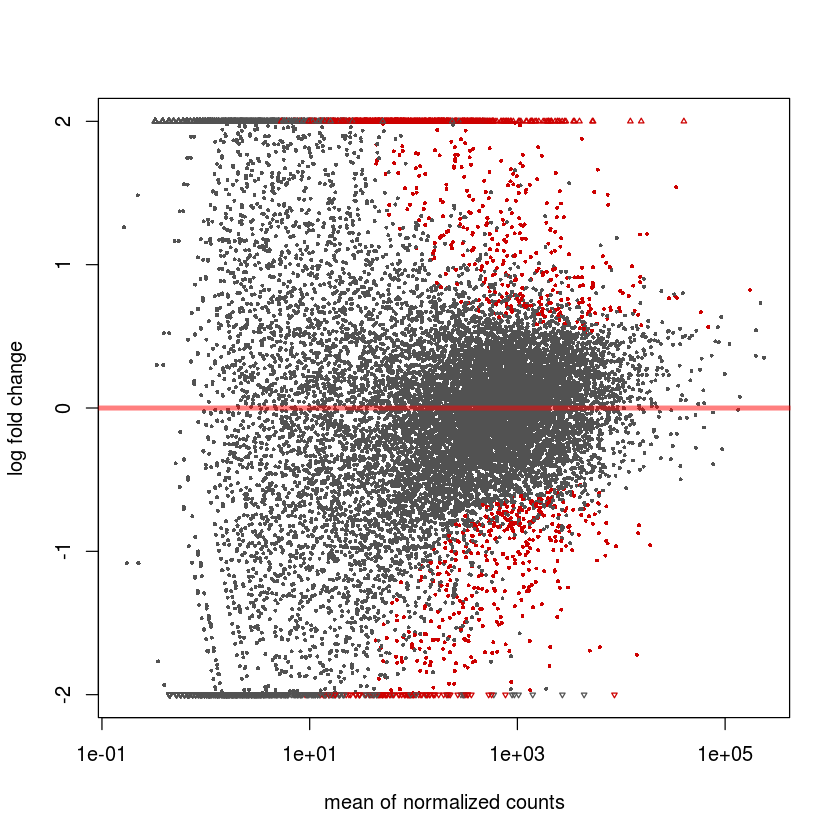

In [32]:
plotMA(res, ylim=c(-2,2))

In [38]:
write.csv(as.data.frame(res_ordered), 
          file=paste0(outdir, "/rnaseq_c57bl6_amln_1wk_deseq_results.txt"))

### Since we are already in R lets take a look at gene ontology enrichment using TopGo

In [41]:
require('topGO')

Loading required package: topGO
Loading required package: graph
Loading required package: GO.db
Loading required package: AnnotationDbi

Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve


groupGOTerms: 	GOBPTerm, GOMFTerm, GOCCTerm environments built.

Attaching package: ‘topGO’

The following object is masked from ‘package:IRanges’:

    members

